In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from sklearn import *
from dashboard_two import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

### sleep_____VS_____diagnosischanges from every visit


In [2]:
com_col = ['Phase', 'RID', 'VISCODE2','PTID']
target = 'DIAG_GROUP'

In [3]:
df = pd.read_csv('../data/main_file_final.csv').drop(['NPIKSEV'],axis=1) 
df = df[df['DIAG_GROUP'].notna()].reset_index(drop=True)  # keep the rows where DXCHANGE is not nan
df

,RID,DIAG,VISCODE2,PTID,AGE,PTGENDER,PTEDUCAT,Phase,EXAMDATE,Ventricles,...,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,PREV_DIAG,DIAG_CHANGED,DIAG_GROUP
0,2,NL,sc,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
1,2,NL,bl,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
2,2,NL,m06,011_S_0002,74.3,Male,16.0,ADNI1,2006-06-03,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
3,2,NL,m36,011_S_0002,74.3,Male,16.0,ADNI1,2008-08-27,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
4,2,NL,m60,011_S_0002,74.3,Male,16.0,ADNI1,2010-09-22,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22196,7102,NL,sc,341_S_7102,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22197,7103,NL,sc,013_S_7103,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22198,7104,NL,sc,153_S_7104,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22199,7105,MCI,sc,035_S_7105,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,MCI,False,MCI-MCI


### sleep______VS______DXCHANGE

In [4]:
col_lst = [ 'DIAG_GROUP','NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8',
       'NPIK9A', 'NPIK9B', 'NPIK9C', 'insomnia','OSA']
df1 = df[com_col + col_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()
col_lst_2 = [ 'DIAG_GROUP','NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8',
       'insomnia','OSA']
#df2 = df[com_col + col_lst_2].set_index(com_col).dropna(how='any',axis=0).reset_index()


# we want to make the model stays simply, and answer two questions

# Q1: will it get worse or not?
# two groups: 
    # MCI-AD or (MCI-MCI, MCI-NL); 
    # (NL-MCI, NL-AD) or NL-NL
label_map = { 'MCI-MCI':'MCI-MCINL','MCI-NL':'MCI-MCINL','MCI-AD':'MCI-AD','NL-AD':'NL-MCIAD','NL-MCI':'NL-MCIAD','NL-NL':'NL-NL'}
df3 = df1.copy()
df3['DIAG_GROUP'] = df3['DIAG_GROUP'].map(label_map)

# Q2: will it get better or not?
# two groups: 
    # MCI-NL or (MCI-MCI, MCI-AD); 
    # (NL-MCI, NL-AD) or NL-NL
label_map2 = { 'MCI-MCI':'MCI-MCIAD','MCI-NL':'MCI-NL','MCI-AD':'MCI-MCIAD'}
df4 = df1.copy()
df4['DIAG_GROUP'] = df4['DIAG_GROUP'].map(label_map2)

df1

,Phase,RID,VISCODE2,PTID,DIAG_GROUP,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,insomnia,OSA
0,ADNI1,8,sc,011_S_0008,NL-NL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
1,ADNI1,8,bl,011_S_0008,NL-NL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
2,ADNI1,8,m06,011_S_0008,NL-NL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
3,ADNI1,8,m12,011_S_0008,NL-NL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
4,ADNI1,8,m36,011_S_0008,NL-NL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7084,ADNI3,7071,bl,027_S_7071,MCI-MCI,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0
7085,ADNI3,7082,sc,073_S_7082,NL-NL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
7086,ADNI3,7082,bl,073_S_7082,NL-NL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
7087,ADNI3,7100,sc,033_S_7100,NL-NL,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0


In [5]:
df1.groupby(target).count()

,Phase,RID,VISCODE2,PTID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,insomnia,OSA
DIAG_GROUP,,,,,,,,,,,,,,,,,
AD-AD,1017,1017,994,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017
AD-MCI,19,19,17,19,19,19,19,19,19,19,19,19,19,19,19,19,19
AD-NL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
MCI-AD,130,130,110,130,130,130,130,130,130,130,130,130,130,130,130,130,130
MCI-MCI,3173,3173,3155,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173
MCI-NL,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
NL-AD,4,4,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4
NL-MCI,59,59,47,59,59,59,59,59,59,59,59,59,59,59,59,59,59
NL-NL,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646


In [6]:
df3.groupby(target).count()

,Phase,RID,VISCODE2,PTID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,insomnia,OSA
DIAG_GROUP,,,,,,,,,,,,,,,,,
MCI-AD,130,130,110,130,130,130,130,130,130,130,130,130,130,130,130,130,130
MCI-MCINL,3213,3213,3195,3213,3213,3213,3213,3213,3213,3213,3213,3213,3213,3213,3213,3213,3213
NL-MCIAD,63,63,48,63,63,63,63,63,63,63,63,63,63,63,63,63,63
NL-NL,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646,2646


In [8]:
np.sum(df1.isna())   # check nan

Phase          0
RID            0
VISCODE2      78
PTID           0
DIAG_GROUP     0
NPIK1          0
NPIK2          0
NPIK3          0
NPIK4          0
NPIK5          0
NPIK6          0
NPIK7          0
NPIK8          0
NPIK9A         0
NPIK9B         0
NPIK9C         0
insomnia       0
OSA            0
dtype: int64

[Text(0.5, 0, 'Diagnosis changes')]

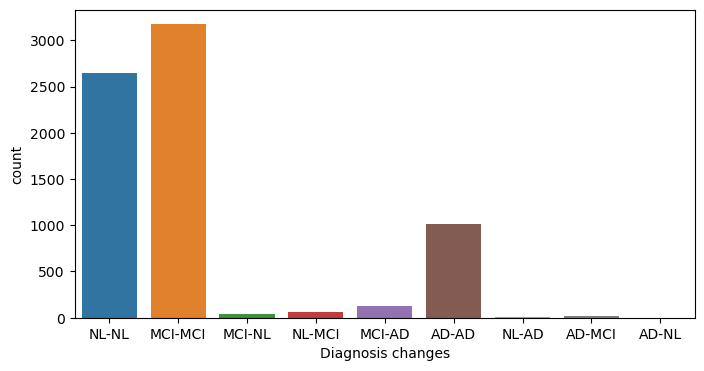

In [9]:
f, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df1, x= target)
ax.set(xlabel='Diagnosis changes')

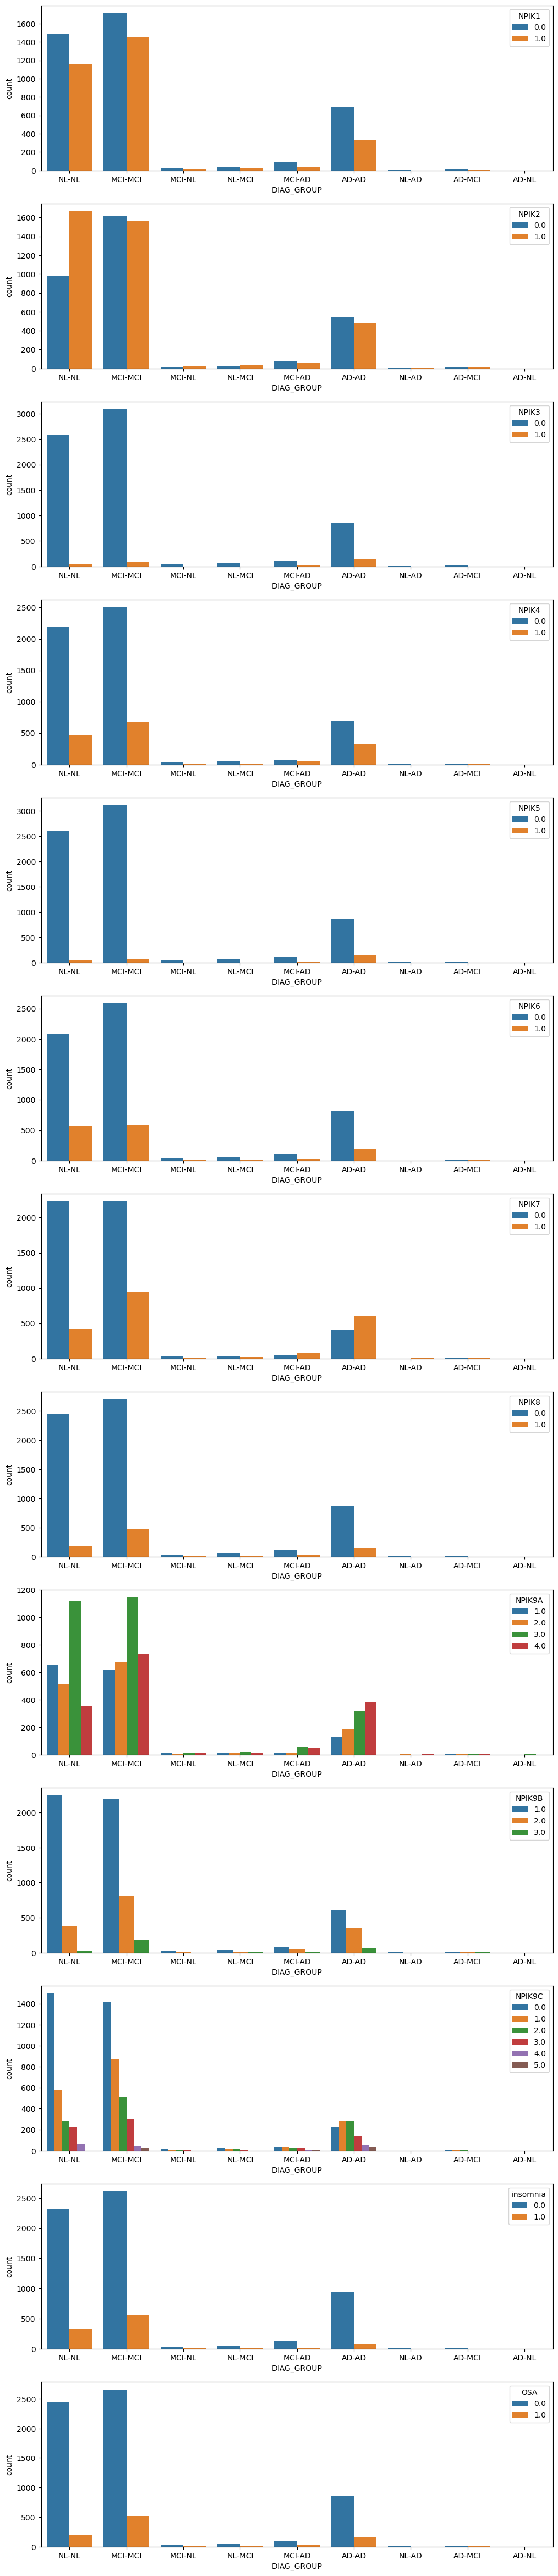

In [10]:
lst = ['NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A',
       'NPIK9B', 'NPIK9C', 'insomnia', 'OSA']

f, axes = plt.subplots(len(lst), 1,figsize=(10, 60))
for i in range(len(lst)):
    ax = sns.countplot(data=df1, hue=lst[i],x= target,ax = axes[i])
    sns.move_legend(ax, "upper right")

- NL-AD, AD-NL have only 4 or 1 datapoints. We will exclude it from modeling.
- AD-MCI is 19 datapoints, which is not a lot for machine learning modeling.

- groups for machine learning models:
    - MCI-AD, MCI-MCI, MCI-NL
    - NL-NL, NL-MCI   

In [11]:
g1 = df1.loc[df1[target].isin(['NL-MCI','NL-NL'])].reset_index(drop=True)
#g21 = df2.loc[df2[target].isin(['NL-MCI','NL-NL'])].reset_index(drop=True)
g31 = df3.loc[df3[target].isin(['NL-MCIAD','NL-NL'])].reset_index(drop=True)
g1.shape  

(2705, 18)

In [12]:
g2 = df1.loc[df1[target].isin(['MCI-AD','MCI-MCI','MCI-NL'])].reset_index(drop=True)
#g22 = df2.loc[df2[target].isin(['MCI-AD','MCI-MCI','MCI-NL'])].reset_index(drop=True)
g32 = df3.loc[df3[target].isin(['MCI-AD','MCI-MCINL'])].reset_index(drop=True)
g42 = df4.loc[df4[target].isin(['MCI-MCIAD','MCI-NL'])].reset_index(drop=True)
g2.shape  

(3343, 18)

In [13]:
g3 = df1.loc[df1[target].isin(['MCI-AD','MCI-MCI'])].reset_index(drop=True)
#g23 = df2.loc[df2[target].isin(['MCI-AD','MCI-MCI'])].reset_index(drop=True)
g3.shape 

(3303, 18)

In [14]:
g4 = df1.loc[df1[target].isin(['MCI-AD','MCI-NL'])].reset_index(drop=True)
#g24 = df2.loc[df2[target].isin(['MCI-AD','MCI-NL'])].reset_index(drop=True)
g4.shape 

(170, 18)

In [15]:
g5 = df1.loc[df1[target].isin(['MCI-MCI','MCI-NL'])].reset_index(drop=True)
#g25 = df2.loc[df2[target].isin(['MCI-MCI','MCI-NL'])].reset_index(drop=True)
g5.shape 

(3213, 18)

- functions
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 

In [16]:
drop_lst = ['Phase', 'RID', 'VISCODE2', 'PTID',target]
k = 10

### conversion or not:  a patient with NL?

In [17]:
cv_models(g1,drop_lst,target,k)

After undersampling data size is 118 ; Resampled dataset shape Counter({'NL-MCI': 59, 'NL-NL': 59})

9 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.520
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.520
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.621
          - saga_L1, average weighted f1-score of 10-cross validation:0.344
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.621
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.632
          - saga_L1, average weighted f1-score of 10-cross validation:0.353
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.632
       - C = 1
          - lb

          - 25trees. average weighted f1-score of 10-cross validation:0.658
          - 30trees. average weighted f1-score of 10-cross validation:0.676
          - 35trees. average weighted f1-score of 10-cross validation:0.635
          - 40trees. average weighted f1-score of 10-cross validation:0.638
          - 45trees. average weighted f1-score of 10-cross validation:0.666
          - 50trees. average weighted f1-score of 10-cross validation:0.658
          - 55trees. average weighted f1-score of 10-cross validation:0.658
          - 60trees. average weighted f1-score of 10-cross validation:0.649
          - 65trees. average weighted f1-score of 10-cross validation:0.658
          - 70trees. average weighted f1-score of 10-cross validation:0.658
          - 75trees. average weighted f1-score of 10-cross validation:0.658
          - 80trees. average weighted f1-score of 10-cross validation:0.650
          - 85trees. average weighted f1-score of 10-cross validation:0.650
          - 

After undersampling data size is 118 ; Resampled dataset shape Counter({'NL-MCI': 59, 'NL-NL': 59})

9 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


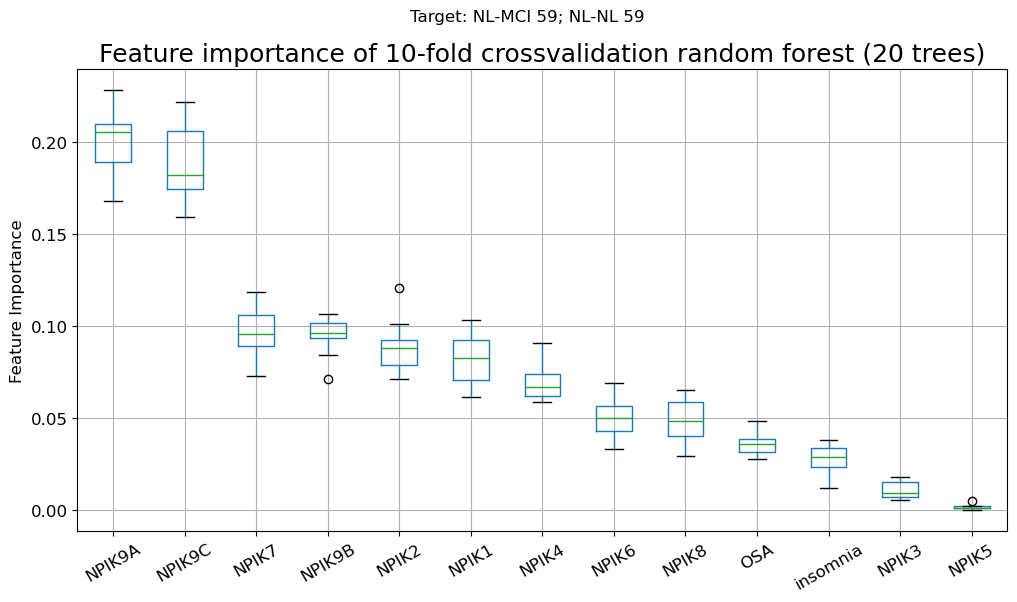

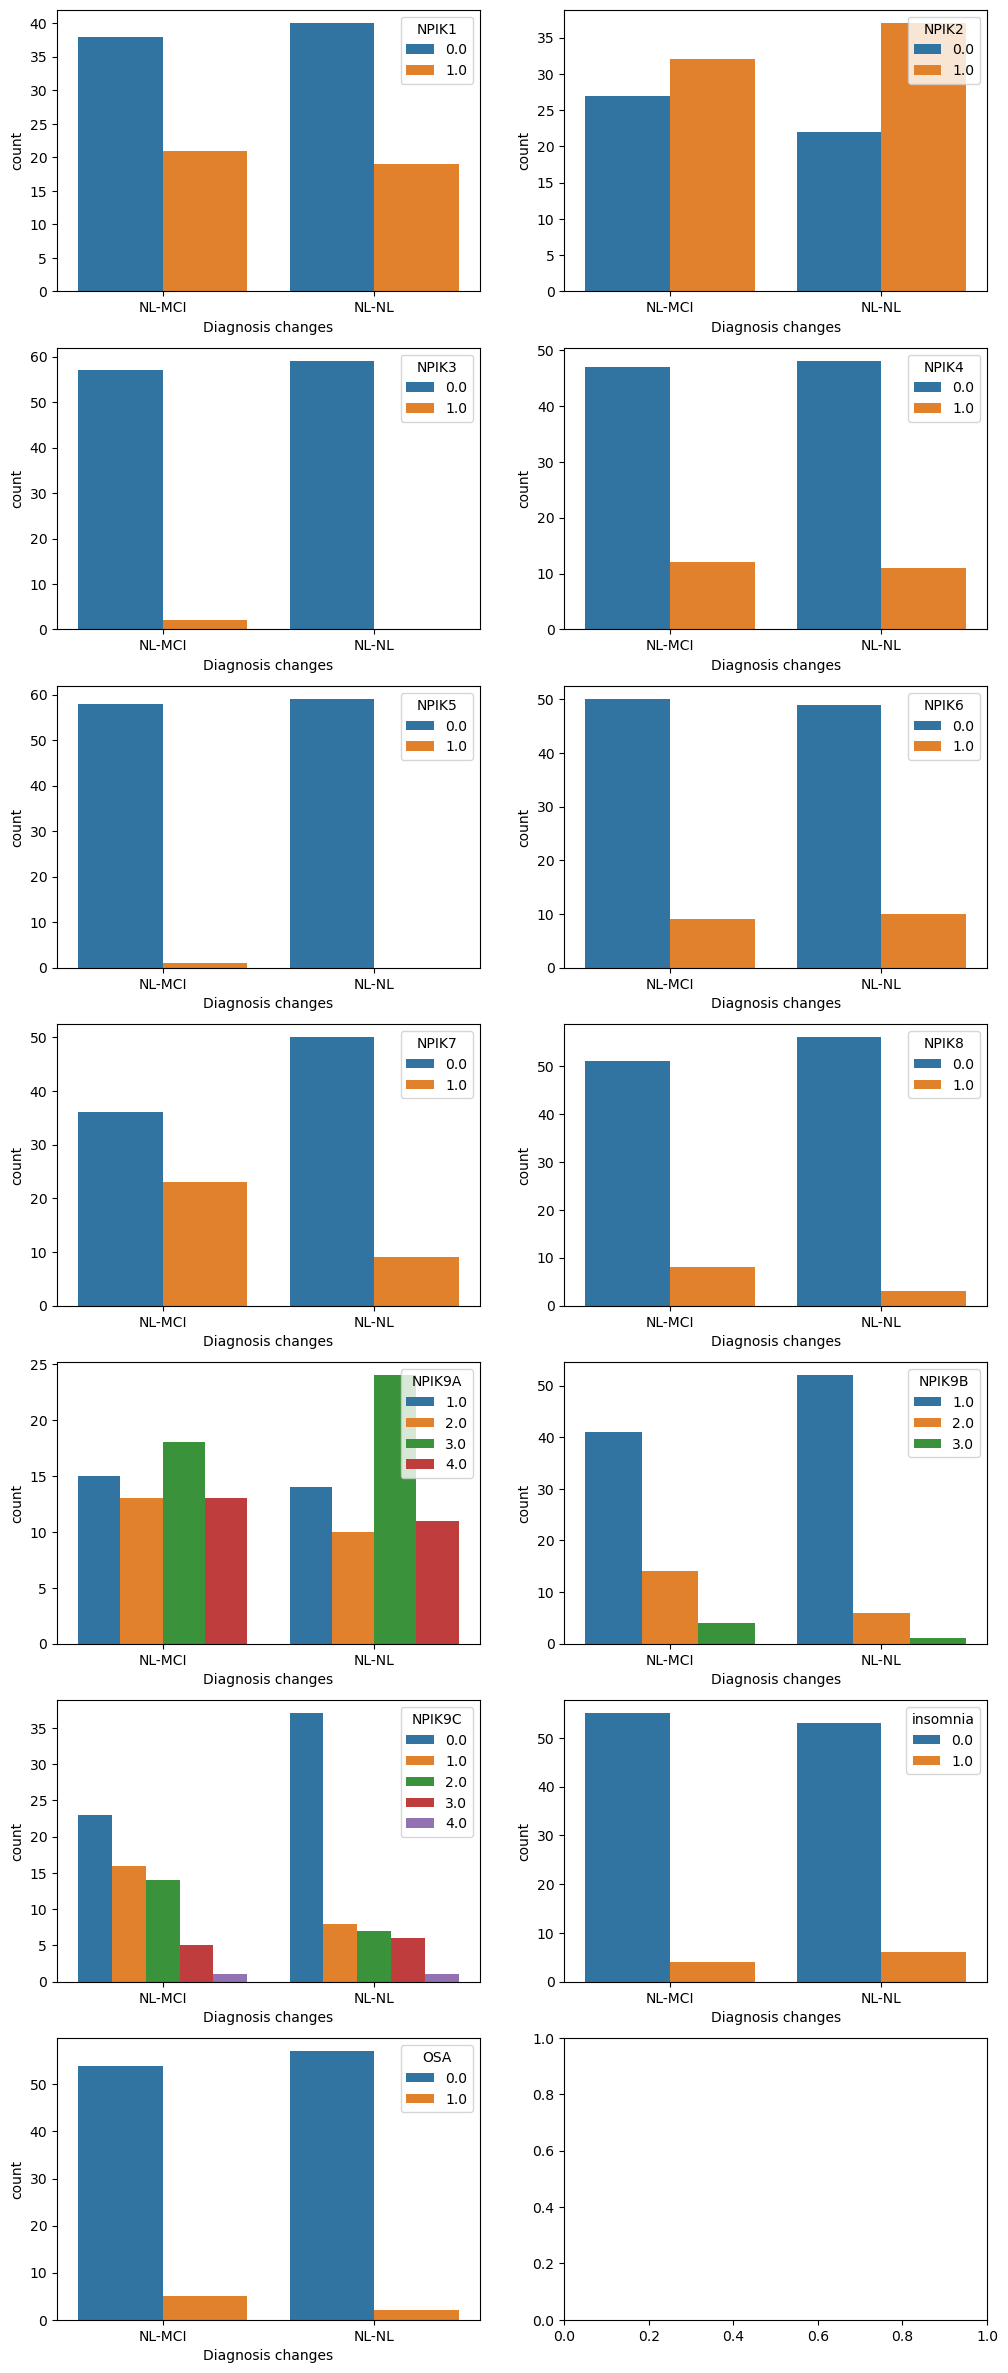

In [18]:
# 20trees. average weighted f1-score of 10-cross validation:0.678
n = 20
res = usampling_scale_data(g1,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,10,title_label)
plt.suptitle('Target: NL-MCI 59; NL-NL 59')

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//2+1,ncols=2,figsize=(12,30))
axes = axes.ravel()
for i in range(len(lst)):
    ax = sns.countplot(data=df_new, hue=lst[i],x= target,ax = axes[i])
    sns.move_legend(ax, "upper right")
    ax.set(xlabel='Diagnosis changes')


In [19]:
cv_models(g31,drop_lst,target,k)

After undersampling data size is 126 ; Resampled dataset shape Counter({'NL-MCIAD': 63, 'NL-NL': 63})

9 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.436
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.436
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.604
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.604
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.572
          - saga_L1, average weighted f1-score of 10-cross validation:0.372
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.572
       - C = 1
          - 

          - 25trees. average weighted f1-score of 10-cross validation:0.577
          - 30trees. average weighted f1-score of 10-cross validation:0.603
          - 35trees. average weighted f1-score of 10-cross validation:0.596
          - 40trees. average weighted f1-score of 10-cross validation:0.604
          - 45trees. average weighted f1-score of 10-cross validation:0.597
          - 50trees. average weighted f1-score of 10-cross validation:0.589
          - 55trees. average weighted f1-score of 10-cross validation:0.597
          - 60trees. average weighted f1-score of 10-cross validation:0.575
          - 65trees. average weighted f1-score of 10-cross validation:0.582
          - 70trees. average weighted f1-score of 10-cross validation:0.593
          - 75trees. average weighted f1-score of 10-cross validation:0.594
          - 80trees. average weighted f1-score of 10-cross validation:0.601
          - 85trees. average weighted f1-score of 10-cross validation:0.608
          - 

After undersampling data size is 126 ; Resampled dataset shape Counter({'NL-MCIAD': 63, 'NL-NL': 63})

9 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


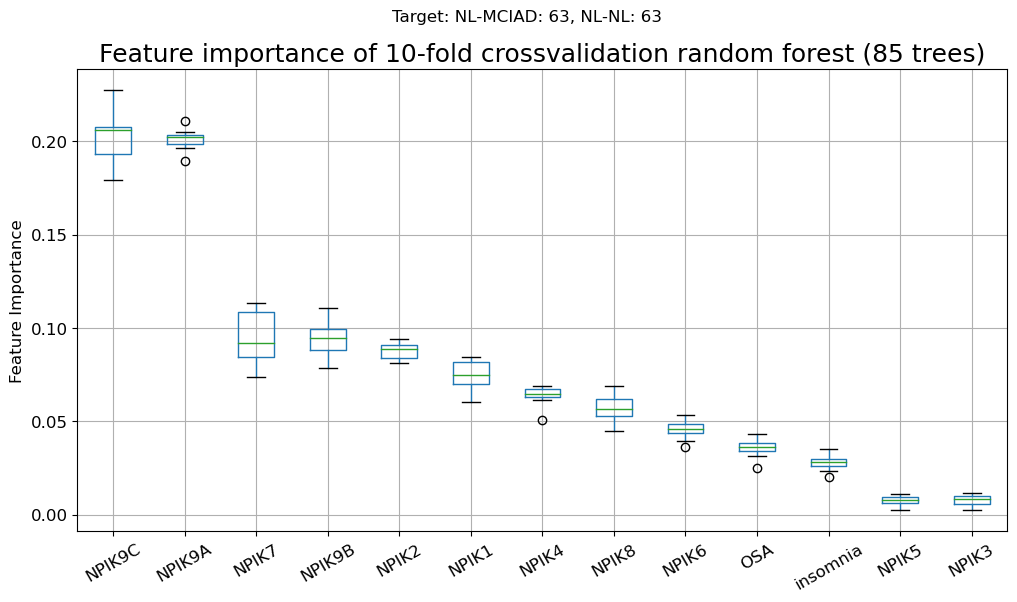

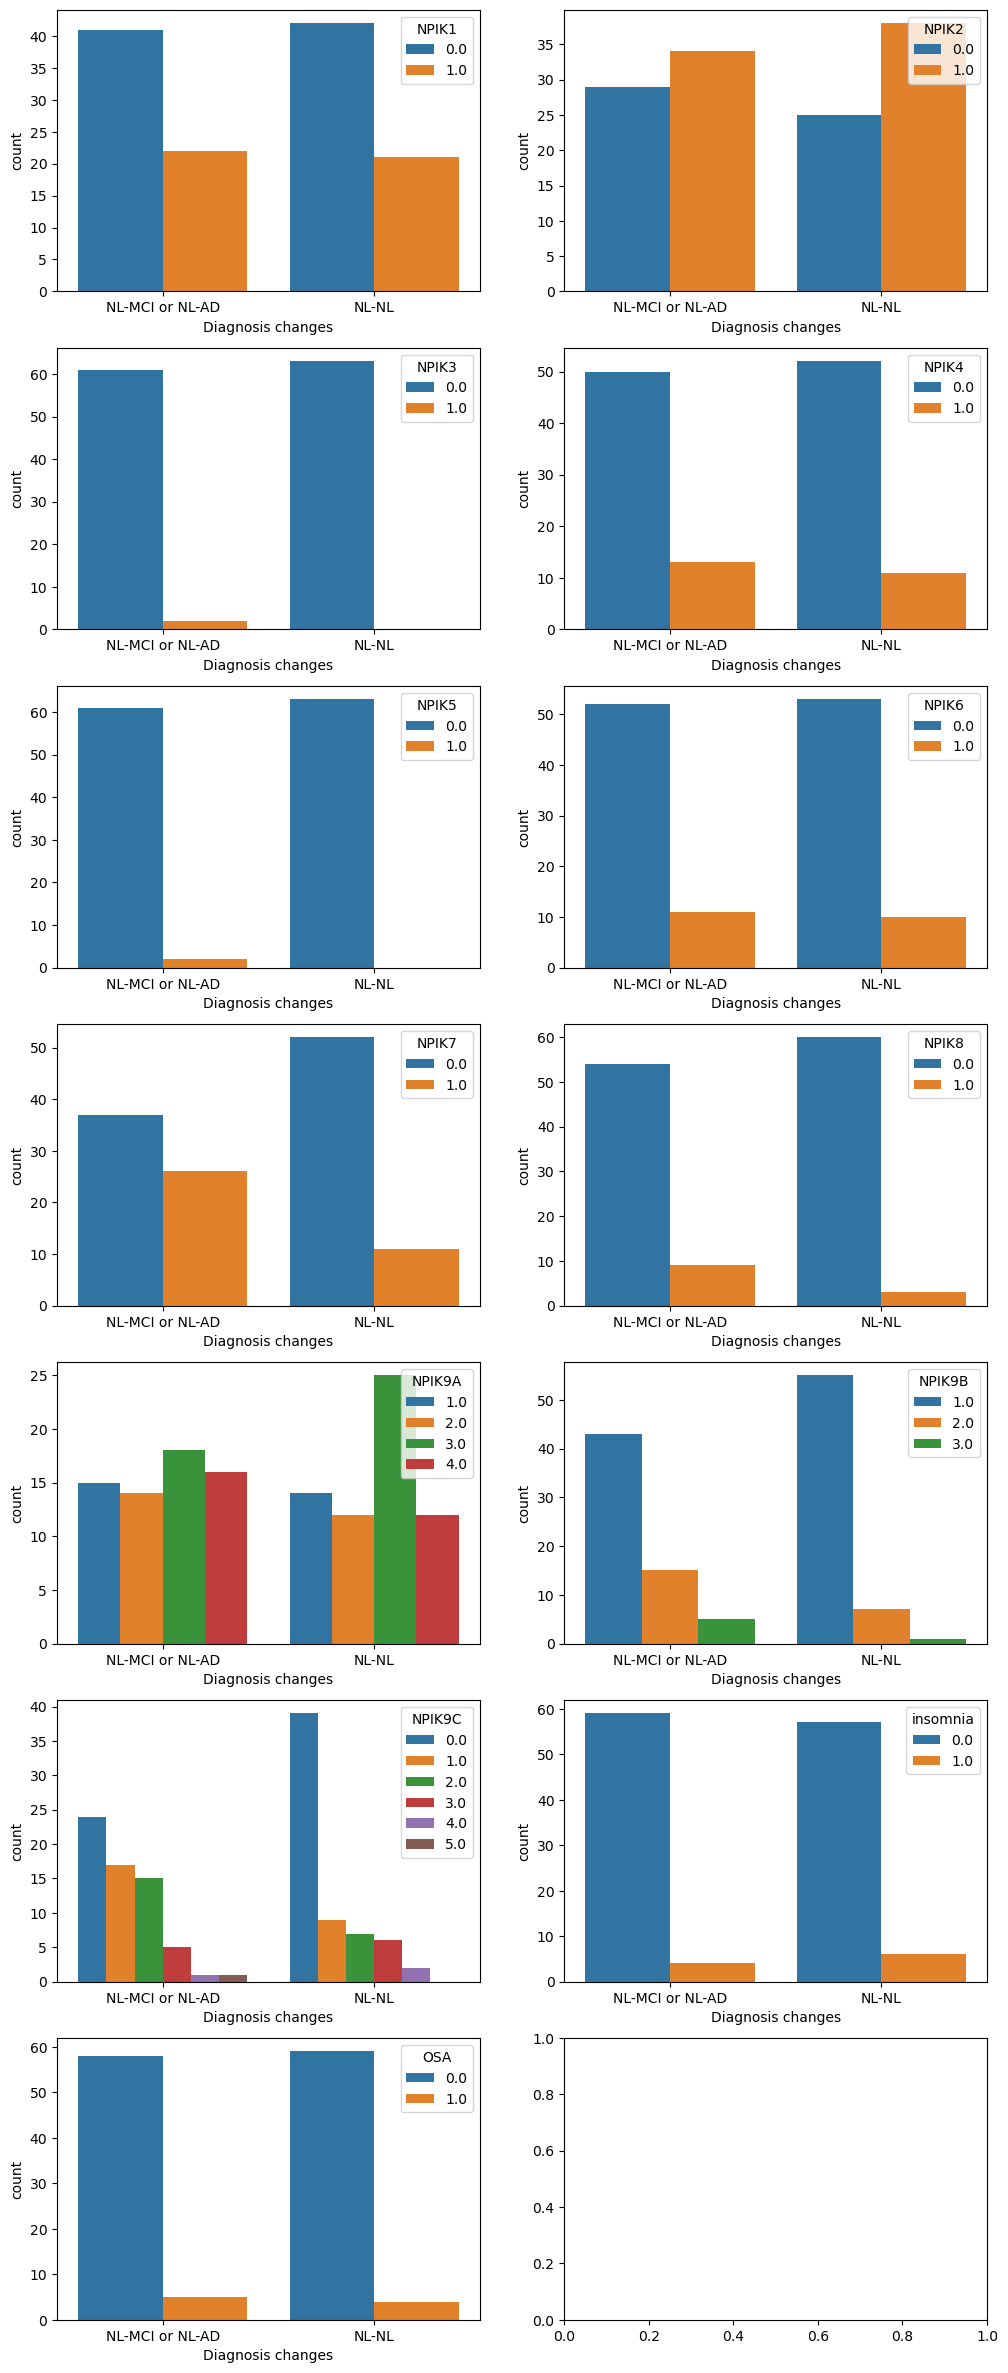

In [20]:
# 85trees. average weighted f1-score of 10-cross validation:0.608
n=85
res = usampling_scale_data(g31,drop_lst,target) 
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: NL-MCIAD: 63, NL-NL: 63')

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//2+1,ncols=2,figsize=(12,30))
axes = axes.ravel()
for i in range(len(lst)):
    ax = sns.countplot(data=df_new, hue=lst[i],x= target,ax = axes[i])
    sns.move_legend(ax, "upper right")
    ax.set(xlabel='Diagnosis changes')
    ax.set_xticklabels(['NL-MCI or NL-AD','NL-NL'])


### conversion: patient with MCI get worse or not

In [21]:
cv_models(g32,drop_lst,target,k) # 'MCI-AD': 130, 'MCI-MCINL': 130

After undersampling data size is 260 ; Resampled dataset shape Counter({'MCI-AD': 130, 'MCI-MCINL': 130})

10 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.615
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.615
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.602
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.602
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.663
          - saga_L1, average weighted f1-score of 10-cross validation:0.586
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.663
       - C = 1
       

          - 25trees. average weighted f1-score of 10-cross validation:0.671
          - 30trees. average weighted f1-score of 10-cross validation:0.674
          - 35trees. average weighted f1-score of 10-cross validation:0.670
          - 40trees. average weighted f1-score of 10-cross validation:0.689
          - 45trees. average weighted f1-score of 10-cross validation:0.689
          - 50trees. average weighted f1-score of 10-cross validation:0.686
          - 55trees. average weighted f1-score of 10-cross validation:0.682
          - 60trees. average weighted f1-score of 10-cross validation:0.677
          - 65trees. average weighted f1-score of 10-cross validation:0.681
          - 70trees. average weighted f1-score of 10-cross validation:0.693
          - 75trees. average weighted f1-score of 10-cross validation:0.693
          - 80trees. average weighted f1-score of 10-cross validation:0.689
          - 85trees. average weighted f1-score of 10-cross validation:0.693
          - 

After undersampling data size is 260 ; Resampled dataset shape Counter({'MCI-AD': 130, 'MCI-MCINL': 130})

10 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


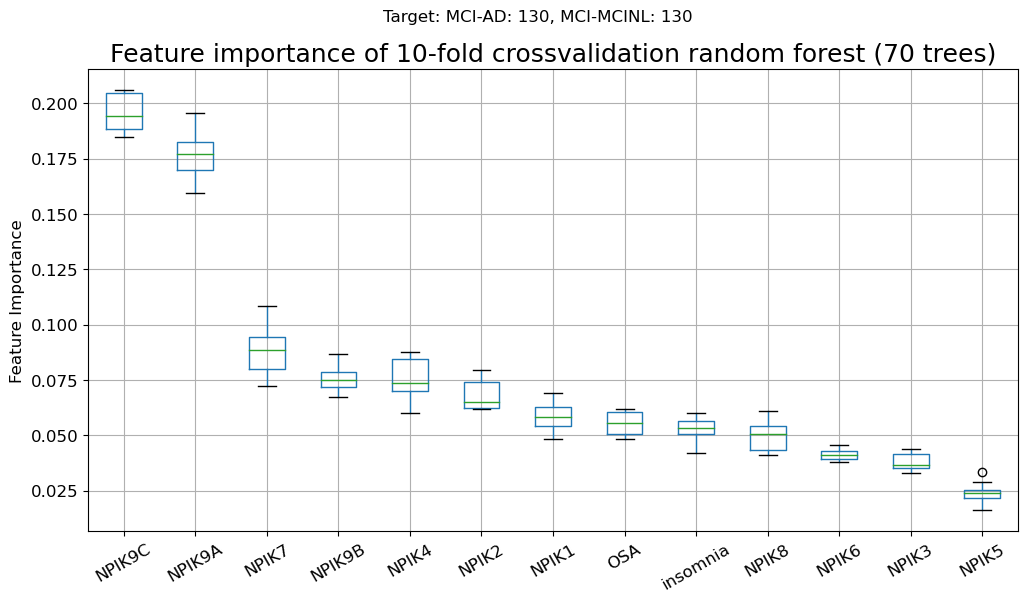

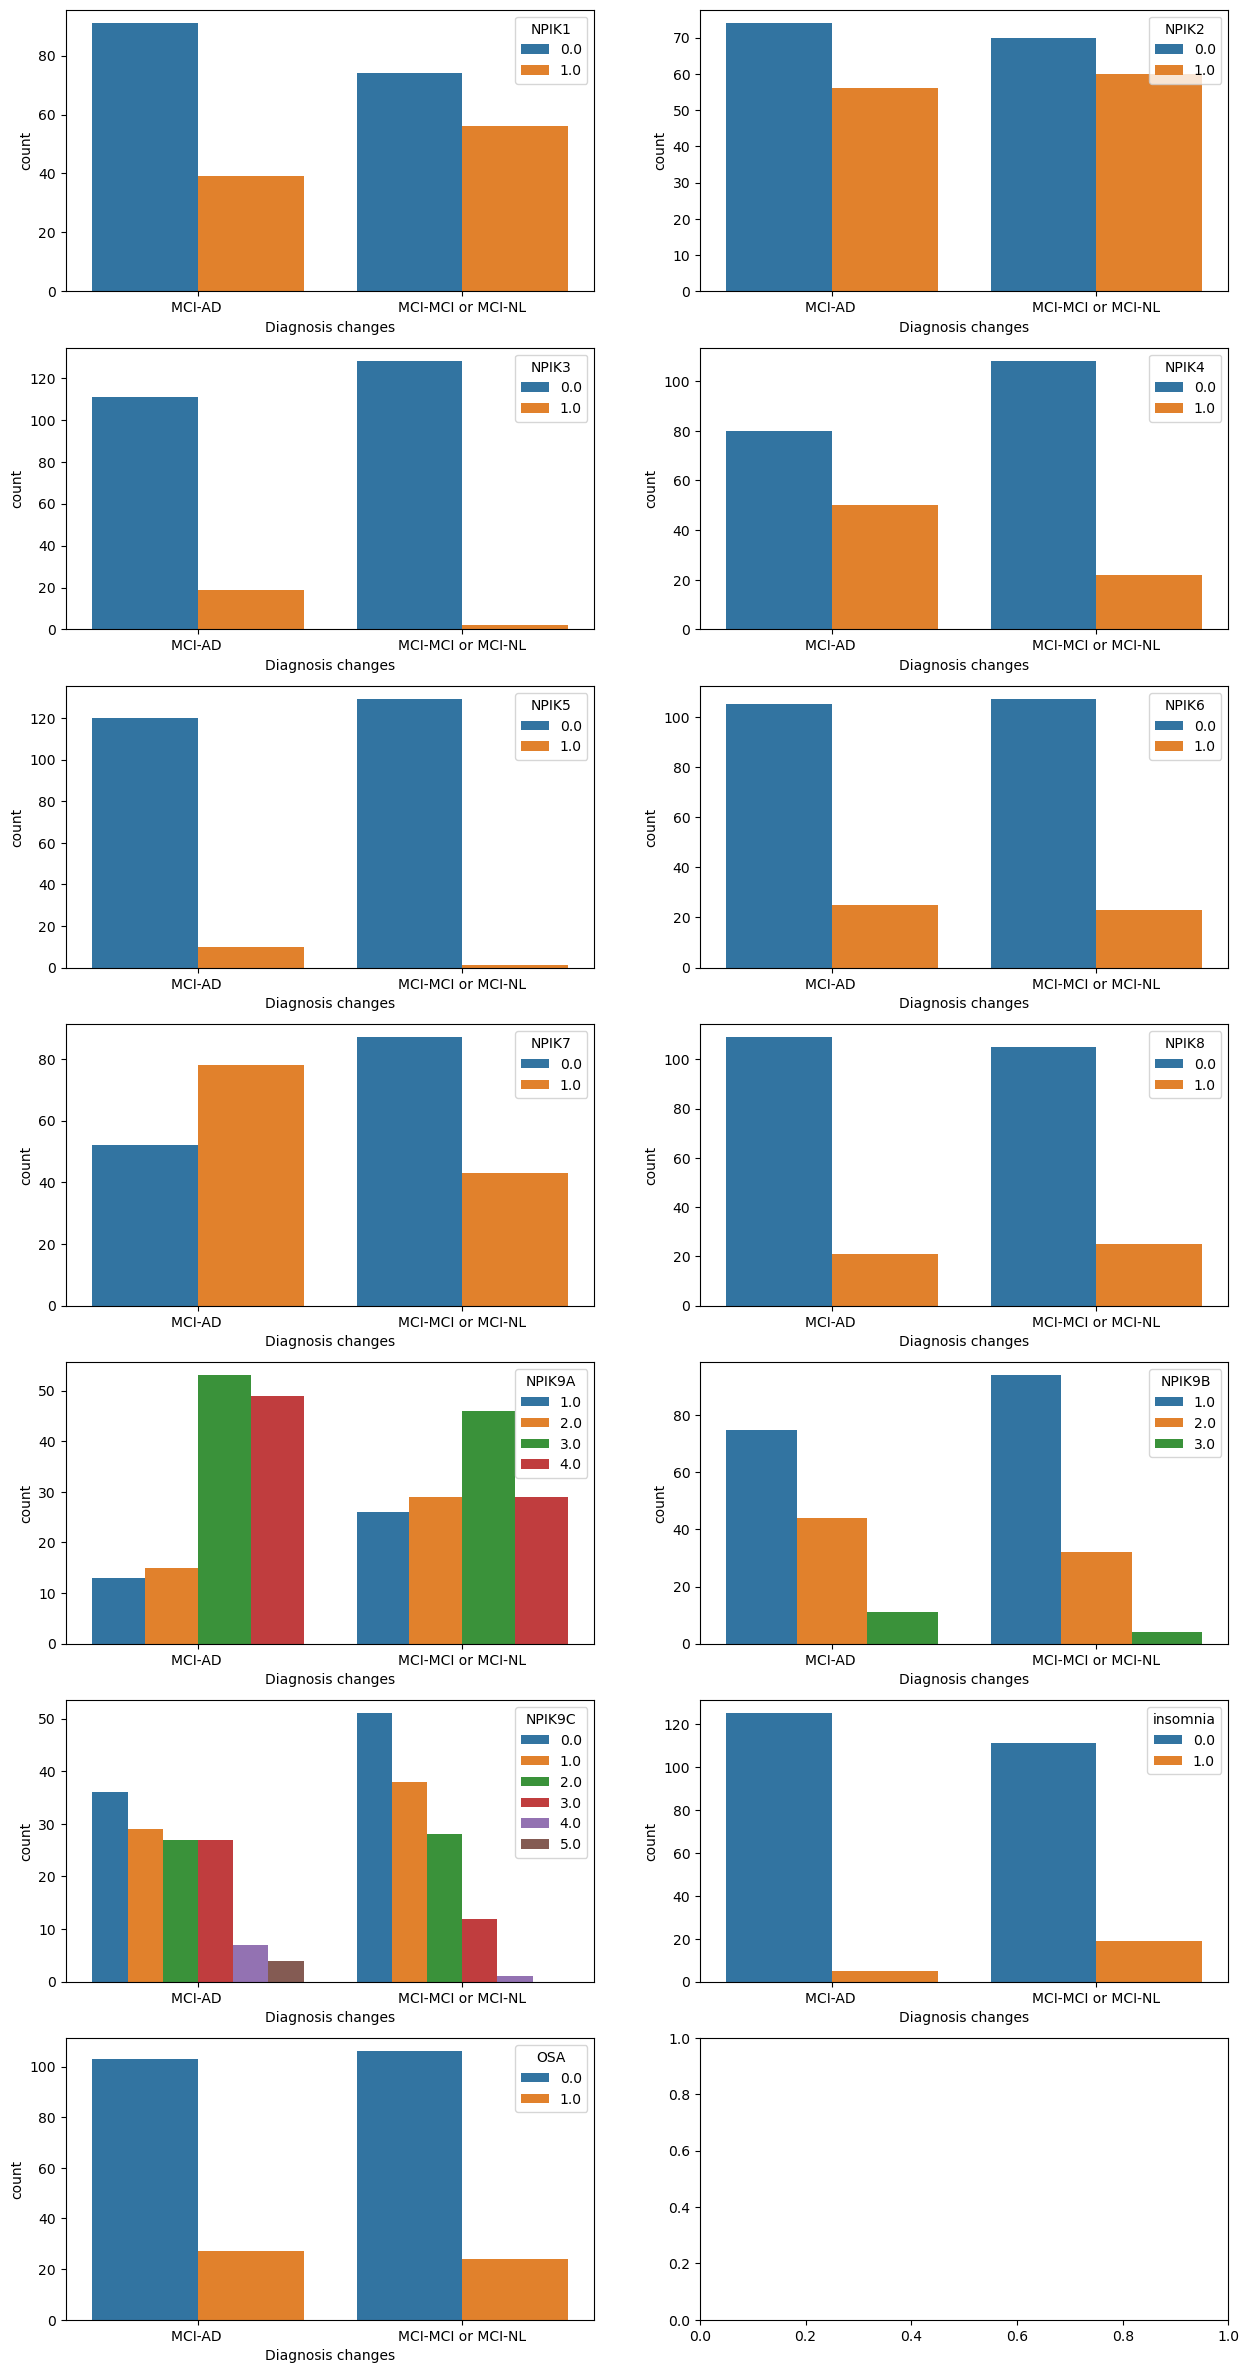

In [22]:
# - 70trees. average weighted f1-score of 10-cross validation:0.697
n = 70
res = usampling_scale_data(g32,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =45, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: MCI-AD: 130, MCI-MCINL: 130')

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//2+1,ncols=2,figsize=(15,30))
axes = axes.ravel()
#f, axes = plt.subplots(len(lst), 1,figsize=(8, 60))
for i in range(len(lst)):
    ax = sns.countplot(data=df_new, hue=lst[i],x= target,ax = axes[i])
    sns.move_legend(ax, "upper right")
    ax.set(xlabel='Diagnosis changes')
    ax.set_xticklabels(['MCI-AD ','MCI-MCI or MCI-NL'])

### keep this one: is a patient with MCI get better or not

In [23]:
cv_models(g42,drop_lst,target,10) #' 'MCI-MCIAD': 40, 'MCI-NL': 40'

After undersampling data size is 80 ; Resampled dataset shape Counter({'MCI-MCIAD': 40, 'MCI-NL': 40})

9 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.499
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.499
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.488
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.488
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.508
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.508
       - C = 1
          -

          - 25trees. average weighted f1-score of 10-cross validation:0.588
          - 30trees. average weighted f1-score of 10-cross validation:0.564
          - 35trees. average weighted f1-score of 10-cross validation:0.588
          - 40trees. average weighted f1-score of 10-cross validation:0.575
          - 45trees. average weighted f1-score of 10-cross validation:0.589
          - 50trees. average weighted f1-score of 10-cross validation:0.589
          - 55trees. average weighted f1-score of 10-cross validation:0.579
          - 60trees. average weighted f1-score of 10-cross validation:0.565
          - 65trees. average weighted f1-score of 10-cross validation:0.565
          - 70trees. average weighted f1-score of 10-cross validation:0.565
          - 75trees. average weighted f1-score of 10-cross validation:0.565
          - 80trees. average weighted f1-score of 10-cross validation:0.565
          - 85trees. average weighted f1-score of 10-cross validation:0.575
          - 

After undersampling data size is 80 ; Resampled dataset shape Counter({'MCI-MCIAD': 40, 'MCI-NL': 40})

9 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


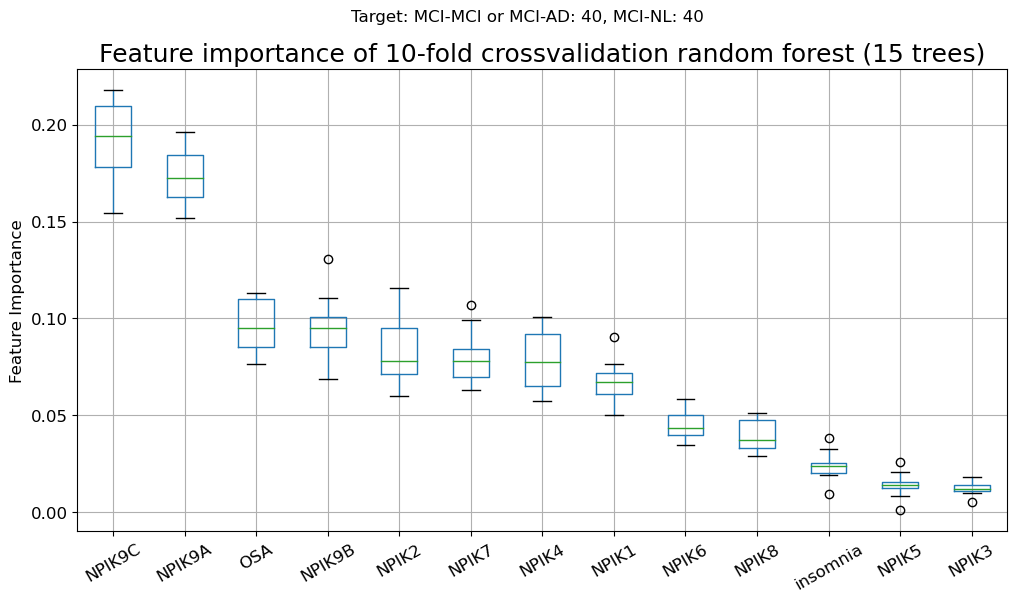

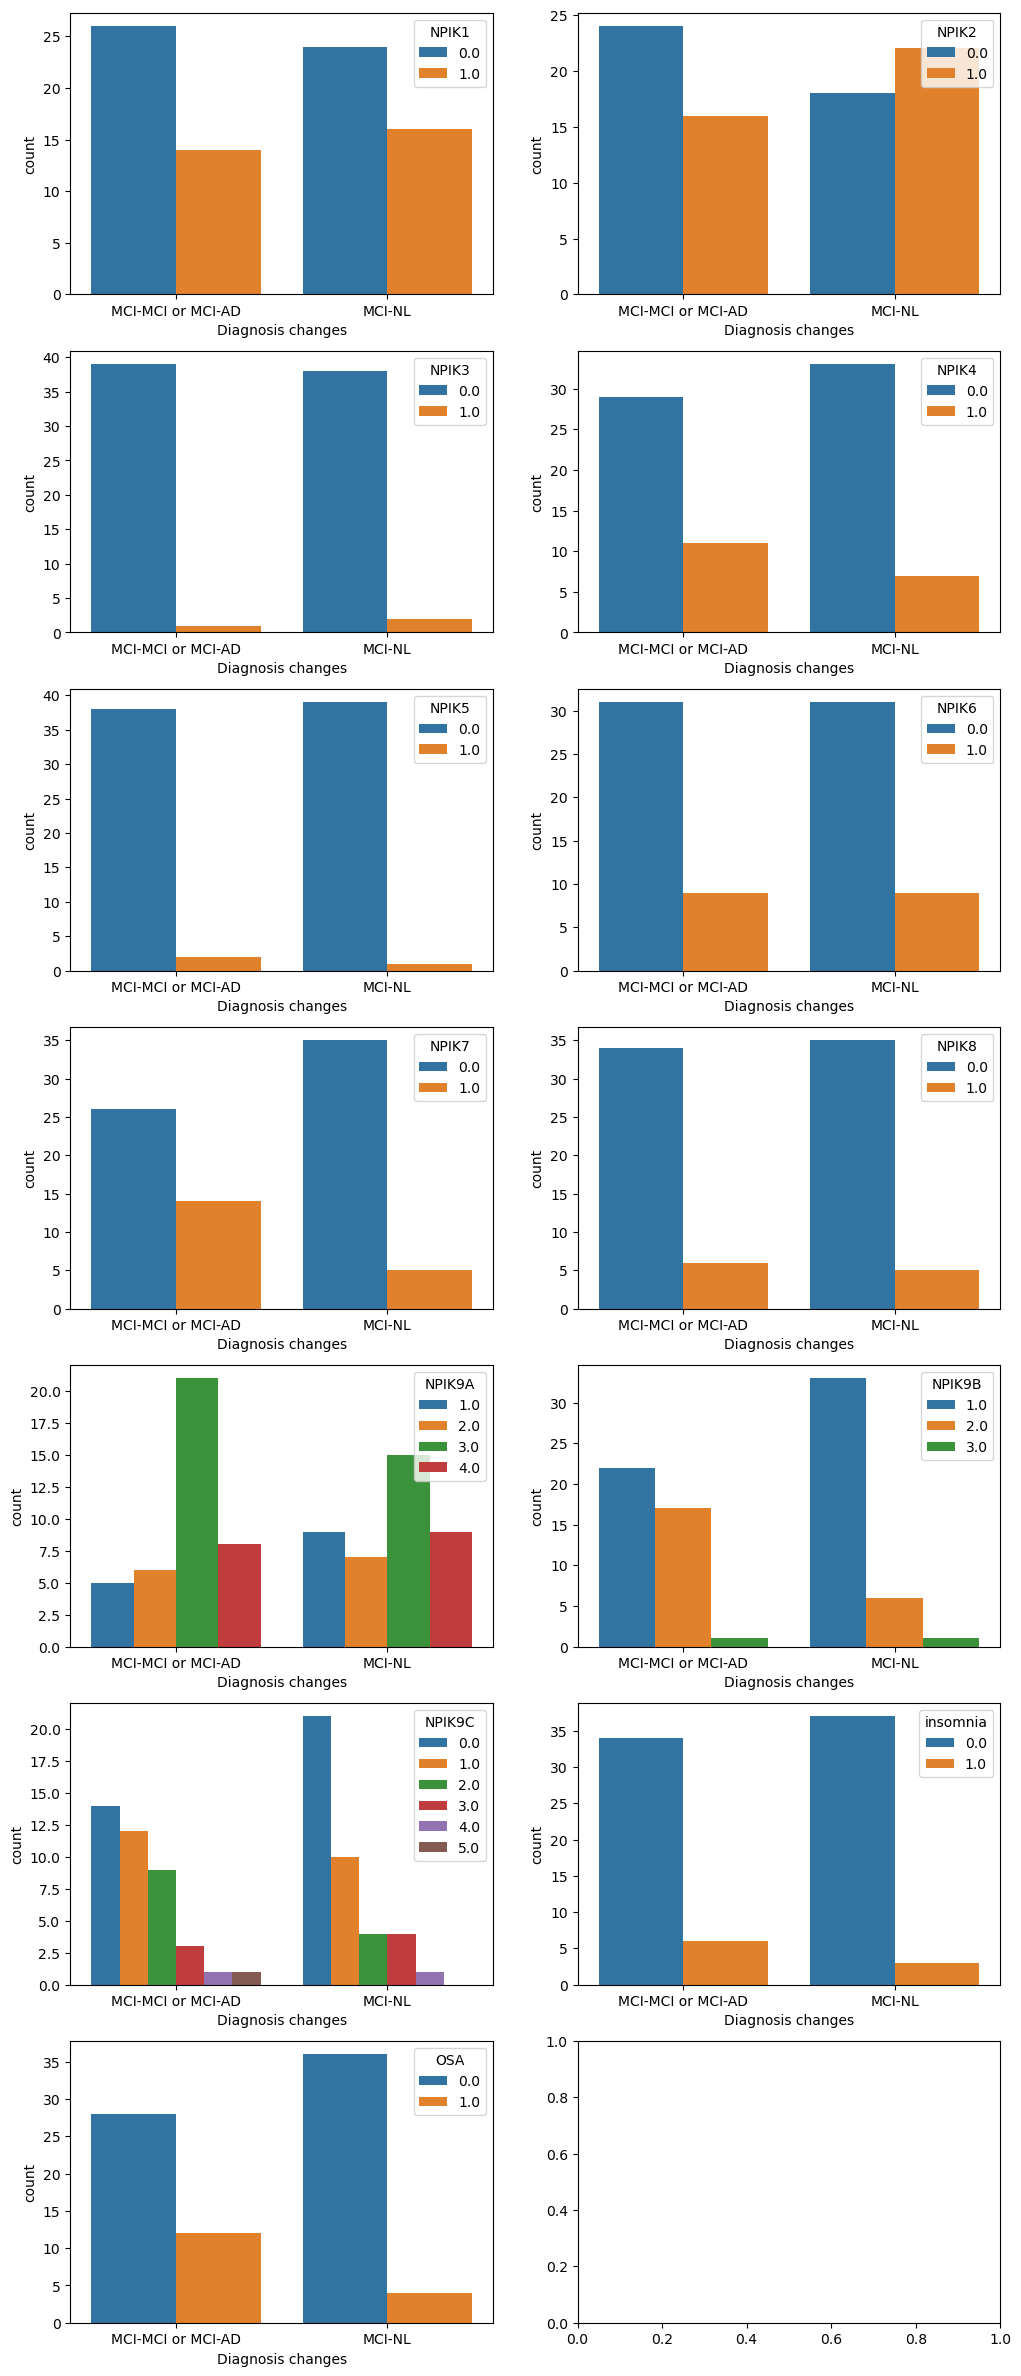

In [24]:
#' 'MCI-MCIAD': 40, 'MCI-NL': 40' :15trees. average weighted f1-score of 10-cross validation:0.599
n = 15
res = usampling_scale_data(g42,drop_lst,target)     

X = res[0] # unscaled input

y = res[3]
clf = RandomForestClassifier(n_estimators =15, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,10,title_label)
plt.suptitle('Target: MCI-MCI or MCI-AD: 40, MCI-NL: 40')
plt.show()


# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//2+1,ncols=2,figsize=(12,30))
axes = axes.ravel()
#f, axes = plt.subplots(len(lst), 1,figsize=(8, 60))
for i in range(len(lst)):
    ax = sns.countplot(data=df_new, hue=lst[i],x= target,ax = axes[i])
    sns.move_legend(ax, "upper right")
    ax.set(xlabel='Diagnosis changes')
    ax.set_xticklabels(['MCI-MCI or MCI-AD','MCI-NL'])